## 기본 데이터 분석

In [1]:
import pandas as pd
df19 = pd.read_csv('./data/1. 19년도-과정이수및평가점수.csv', encoding='euc-kr')
df15 = pd.read_excel('./data/2. 15-19년전체집계.xlsx')

----------------
<span style="color:yellow">1. pandas 로 데이터 전처리 및 저장<span>

사전 데이터 분석 결과로부터 사실은 결측치일 가능성이 높다고 판명된, df15 자료의 0점 처리된 C, E, F, G 과목성적을 다시 결측치로 치환한다.  
또한 학과명 실내디자인과(학부) 를 실내디자인과 로 치환 후 새로운 파일로 저장한다.

In [2]:
df15 = df15.replace({'학과': {'실내디자인과(학부)':'실내디자인과'}})

In [3]:
from numpy import NaN
df15 = df15.replace({'C과목': {0.0: NaN}})
df15 = df15.replace({'E과목': {0.0: NaN}})
df15 = df15.replace({'F과목': {0.0: NaN}})
df15 = df15.replace({'G과목': {0.0: NaN}})
df15.to_excel('./data/pdf15.xlsx', index=False)
pdf15 = pd.read_excel('./data/pdf15.xlsx')

In [4]:
pdf15.head()

,연도,학과,학생구분,응시자수,A과목,B과목,F과목,D과목,G과목,C과목,E과목
0,2019,건축설비소방과,신입생,70,3.028571,4.514286,NaN,3.400000,NaN,3.914286,3.728571
1,2019,건축학부,신입생,229,2.982533,4.903930,NaN,3.489083,NaN,3.572052,3.589520
2,2019,경영학부,신입생,147,2.829932,4.544218,NaN,3.993197,NaN,3.659864,3.741497
3,2019,글로벌외식조리학부,신입생,147,3.136054,4.265306,NaN,3.476190,NaN,3.700680,3.829932
4,2019,기계과,신입생,87,3.022989,4.321839,NaN,3.229885,NaN,3.701149,3.747126


In [5]:
pdf15.tail()

,연도,학과,학생구분,응시자수,A과목,B과목,F과목,D과목,G과목,C과목,E과목
273,2015,스포츠지도과,재학생,40,2.650000,4.375000,3.475000,3.300000,3.850000,NaN,NaN
274,2015,호텔조리과,재학생,15,3.933333,5.266667,3.466667,4.133333,4.333333,NaN,NaN
275,2015,호텔외식서비스과,재학생,15,3.400000,4.533333,3.400000,3.800000,4.333333,NaN,NaN
276,2015,언어재활과,재학생,29,3.586207,5.103448,3.724138,3.206897,4.482759,NaN,NaN
277,2015,중국비즈니스과,재학생,27,2.851852,4.814815,3.444444,3.925926,4.333333,NaN,NaN


----------------
<span style="color:yellow">2. 학과별 NCS 직업기초능력 시험평가 응시자 수 분석<span>

In [6]:
test_num = pdf15.groupby(['학생구분', '연도'])['응시자수'].sum().reset_index(drop=False)
test_num

,학생구분,연도,응시자수
0,신입생,2015,1080
1,신입생,2016,2244
2,신입생,2017,2318
3,신입생,2018,1188
4,신입생,2019,2008
5,재학생,2015,926
6,재학생,2016,859
7,재학생,2017,902
8,재학생,2018,869
9,재학생,2019,1469


In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.rc('font', family='D2Coding') 
plt.figure(figsize=(20,20))
plt.rcParams['axes.grid'] = True

<IPython.core.display.Javascript object>

In [11]:
sns.relplot(x='연도', y='응시자수', hue='학생구분', data=test_num)
plt.savefig("./image/3_1fig.png")

<IPython.core.display.Javascript object>

<img src='./image/3_1fig.png' alt="3_1fig" width="600"/>

In [115]:
pdf15.학과.unique()

array(['건축설비소방과', '건축학부', '경영학부', '글로벌외식조리학부', '기계과', '디지털전자과', '메카트로닉스과',
       '방송음향영상학부', '비서사무행정과', '사회복지과', '스포츠지도과', '아동문헌정보과', '언어재활과',
       '유아교육과', '의공융합과', '자동차학부', '자동화시스템과', '전기과', '전자통신과', '컴퓨터정보학부',
       '토목환경과', '항공호텔관광학부', '건축과', '경영과', '모바일인터넷과', '방송음향영상과', '산업경영과',
       '세무회계과', '실내디자인과', '자동차과', '컴퓨터소프트웨어과', '항공서비스과', '호텔관광과',
       '호텔외식서비스과', '호텔조리과', '자동화시스템', '문헌정보과', '중국비즈니스과'], dtype=object)

In [1]:
pdf15.연도.unique()

NameError: name 'pdf15' is not defined

In [158]:
pdf15.학생구분.unique()

array(['신입생', '재학생'], dtype=object)

In [167]:
tot_stud_num = pdf15.groupby(['학생구분', '연도'])

In [168]:
tot_stud_num

In [172]:
tot_stud_num['응시자수'].sum()

학생구분  연도  
신입생   2015    1080
      2016    2244
      2017    2318
      2018    1188
      2019    2008
재학생   2015     926
      2016     859
      2017     902
      2018     869
      2019    1469
Name: 응시자수, dtype: int64

In [175]:
tot_stud_num['응시자수'].sum().reset_index(drop=False)

,학생구분,연도,응시자수
0,신입생,2015,1080
1,신입생,2016,2244
2,신입생,2017,2318
3,신입생,2018,1188
4,신입생,2019,2008
5,재학생,2015,926
6,재학생,2016,859
7,재학생,2017,902
8,재학생,2018,869
9,재학생,2019,1469


In [174]:
tot_stud_num['응시자수'].sum()[('신입생', 2016)]

2244

In [162]:
tot_stud_num.groups

{'신입생': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, ...], '재학생': [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, ...]}

In [149]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='학생구분,연도'>

C:\Users\ZeroE\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ZeroE\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
C:\Users\ZeroE\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
C:\Users\ZeroE\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\ZeroE\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kw

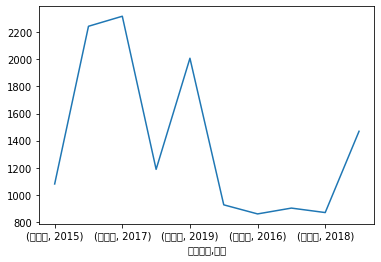

In [150]:
tot_stud_num.plot()

In [136]:
type(tot_stud_num)

pandas.core.series.Series

In [132]:
tot_stud_num[9]

1469

In [133]:
tot_stud_num.shape

(10,)

Couldn't find program: 'bash'
